In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from matplotlib import pyplot as plt

import utils
import generators
import bases
import representations
import reconstructions
from functools import partial

from test_base import TestNDTorus, TestTwoDTorus

In [2]:
def get_reconstructed_data(instance, is_print=False):
    KM = reconstructions.get_koopman_modes(instance.Xr, np.linalg.inv(instance.V), instance.basis)
    Ph = instance.basis(instance.Er[0])@instance.V
    L = instance.D
    reconstructed_data = np.array([np.squeeze(Ph @ np.diag(np.power(L, k)) @ KM) for k in range(instance.Er.shape[0])])
    if is_print:
        print(f"KM {KM.shape}, Ph {Ph.shape}, L {L.shape}")
        print(f"reconstruction {reconstructed_data.shape}")
    return reconstructed_data

def compare_plot_on_unit_square(data1, data2):
    assert data1.ndim == 2
    assert data2.ndim == 2
    N = len(data1)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    axs[0].scatter(data1[:,0], data1[:,1], c=list(range(N)))
    axs[0].axvline(1.0)
    axs[0].axvline(0.0)
    axs[0].axhline(1.0)
    axs[0].axhline(0.0)
    axs[0].set_ylabel('original x')
    axs[0].set_xlabel('original y')
    axs[0].set_xlim(-0.1,1.1)
    axs[0].set_ylim(-0.1,1.1)

    axs[1].scatter(data2[:,0], data2[:,1], c=list(range(N)))
    axs[1].axvline(1.0)
    axs[1].axvline(0.0)
    axs[1].axhline(1.0)
    axs[1].axhline(0.0)
    axs[1].set_ylabel('reconstruction x')
    axs[1].set_xlabel('reconstruction y')
    axs[1].set_xlim(-0.1,1.1)
    axs[1].set_ylim(-0.1,1.1)

    # fig.colorbar(range(N))
    plt.show()
    return

def compare_plot(X, reconstructed_data):
    assert X.ndim == 2
    assert reconstructed_data.ndim == 2
    N = len(X)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    axs[0].plot(X)
    axs[0].set_ylabel('original x')
    axs[0].set_xlabel('original y')
    axs[0].set_ylim(-0.1,1.1)

    axs[1].plot(reconstructed_data)
    axs[1].set_ylabel('reconstruction x')
    axs[1].set_xlabel('reconstruction y')
    axs[1].set_ylim(-0.1,1.1)

    # fig.colorbar(range(N))
    plt.show()
    return

def simple_plot(data):
    plt.plot(data)
    plt.ylim(-0.1, 1.1)
    plt.show()

In [3]:
def test_reconstruction(representation, degree=10, combination=True, N=10):
    basis = partial(bases.fourier_basis, degree=degree, combinations=combination)
    kwargs = {
        'ncols': 2,
        'n_dim': 2,
        'n_samples': 100,
        'degree': degree,
        'combinations': combination,
        'representation': partial(representation, basis=basis),
    }
    tdt = TestNDTorus(**kwargs)
    results = tdt.run()

    reconstructed_data = get_reconstructed_data(tdt, is_print=True)
    compare_plot_on_unit_square(tdt.Er, reconstructed_data)
    compare_plot(tdt.Er[:min(N, kwargs['n_samples'])], reconstructed_data[:min(N, kwargs['n_samples'])])
    compare_plot(tdt.Er, reconstructed_data)
    return

# mpEDMD with Fourier basis

KM (441, 2), Ph (1, 441), L (441,)
reconstruction (200, 2)


/Users/hajime/workspace/tum/Master's Thesis/venv/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


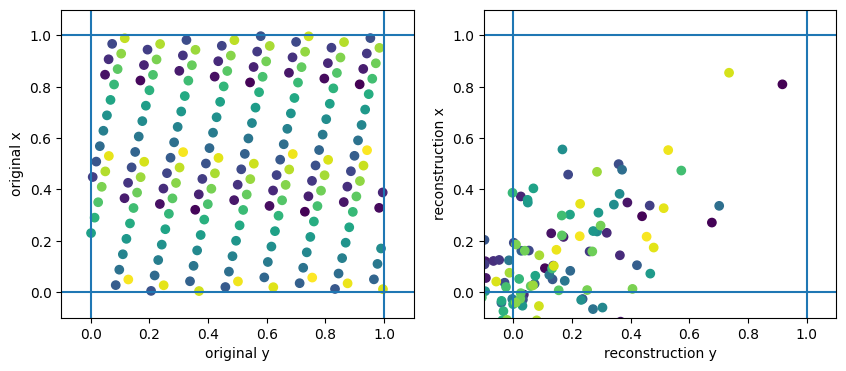

/Users/hajime/workspace/tum/Master's Thesis/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


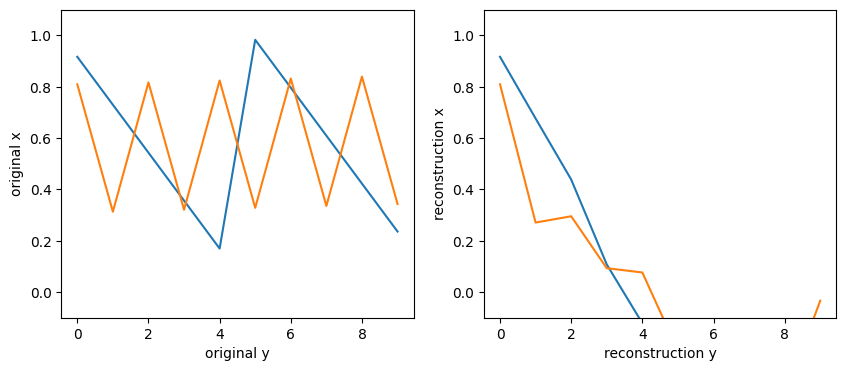

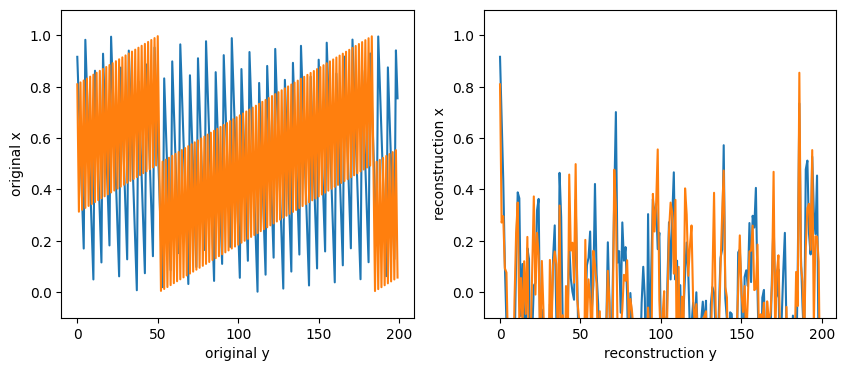

In [4]:
test_reconstruction(representations.mpEDMD_matrix_representation)

## EDMD with Fourier basis

KM (441, 2), Ph (1, 441), L (441,)
reconstruction (200, 2)


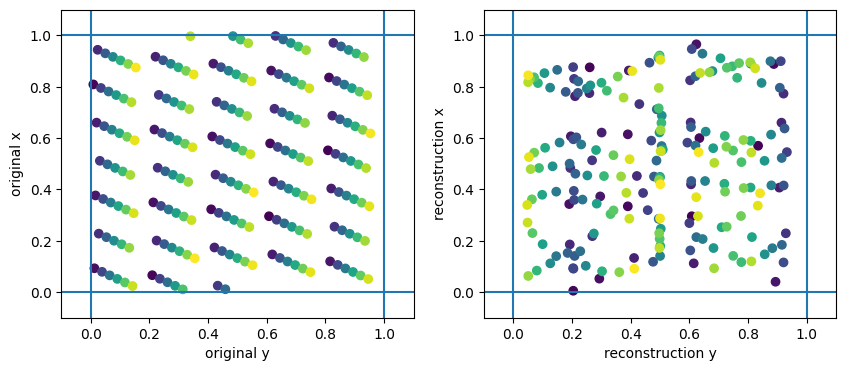

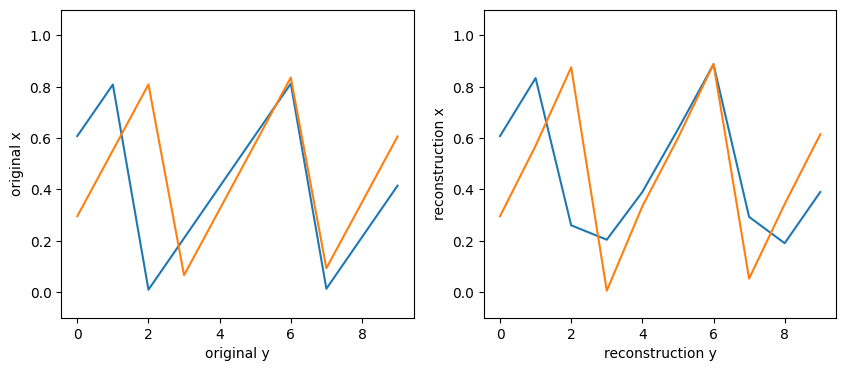

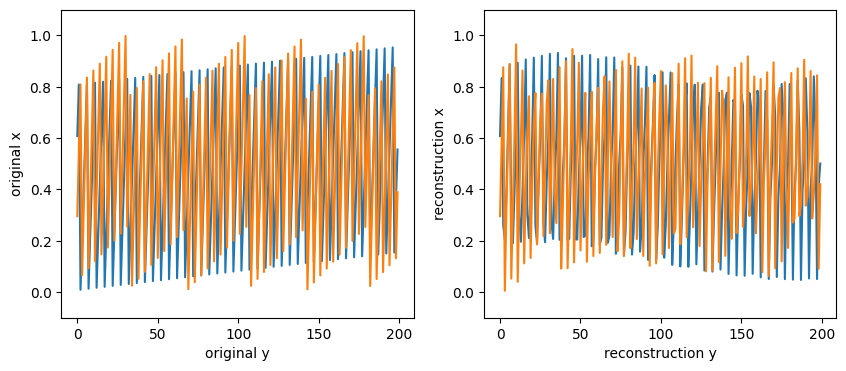

In [5]:
test_reconstruction(representations.EDMD_matrix_representation)